In [20]:
import numpy as np
import os 
import pickle
import matplotlib.pyplot as plt

# Basic installation test

In [17]:
# The output should look like this: 
# <module 'Alpaga' from '/home/glebreton/.local/lib/python3.7/site-packages/Alpaga/__init__.py'>
# if you have the "ModuleNotFoundError: No module named 'Alpaga'", then you have not correctly installed the package. Please, refer to the wiki. 

import Alpaga # the full package
print(Alpaga)


<module 'Alpaga' from '/home/glebreton/.local/lib/python3.7/site-packages/Alpaga/__init__.py'>


# Integration test: file management

# Integration test: analysis 

Second Run, Angle: 188.0
/home/glebreton/.local/lib/python3.7/site-packages/Alpaga/Data_tutorial/SHS/Eau_polar_V/Spectre_188.0_1.dat
/home/glebreton/.local/lib/python3.7/site-packages/Alpaga/Data_tutorial/SHS/Eau_polar_V/Spectre_188.0_2.dat
/home/glebreton/.local/lib/python3.7/site-packages/Alpaga/Data_tutorial/SHS/Eau_polar_V/Spectre_188.0_3.dat
/home/glebreton/.local/lib/python3.7/site-packages/Alpaga/Data_tutorial/SHS/Eau_polar_V/Spectre_188.0_4.dat
/home/glebreton/.local/lib/python3.7/site-packages/Alpaga/Data_tutorial/SHS/Eau_polar_V/Spectre_188.0_5.dat
/home/glebreton/.local/lib/python3.7/site-packages/Alpaga/Data_tutorial/SHS/Eau_polar_V/Spectre_188.0_6.dat
/home/glebreton/.local/lib/python3.7/site-packages/Alpaga/Data_tutorial/SHS/Eau_polar_V/Spectre_188.0_7.dat
/home/glebreton/.local/lib/python3.7/site-packages/Alpaga/Data_tutorial/SHS/Eau_polar_V/Spectre_188.0_8.dat
/home/glebreton/.local/lib/python3.7/site-packages/Alpaga/Data_tutorial/SHS/Eau_polar_V/Spectre_188.0_9.dat
/ho

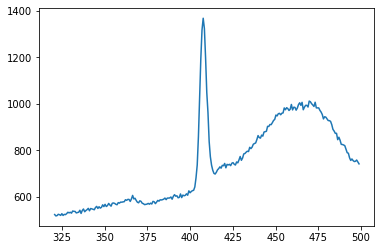

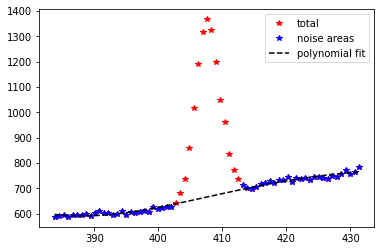

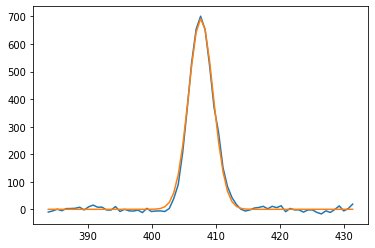

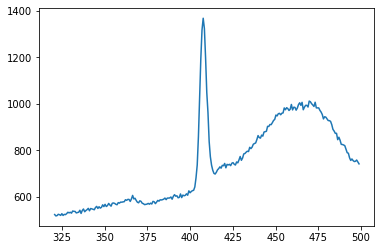

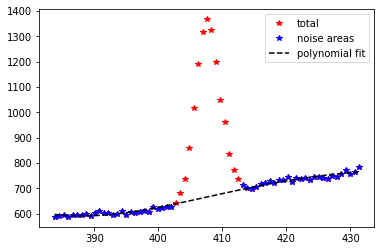

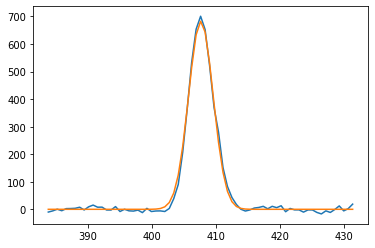

The results are not saved. Set save_result to True if you want to save them.


In [6]:
import Alpaga
from Alpaga import analyze_run
import Alpaga.Data_tutorial

################# Test Run ######################
Dir_tuto_file = os.path.dirname(Alpaga.Data_tutorial.__file__) # where is stored to tutorial files
directory = os.path.join(Dir_tuto_file, 'SHS/Eau_polar_V')
prefix_file = False
L_files_angles = False 
N_iter = False
extention = '.dat'
fct_name = Alpaga.file_management.standard_file_name 
name_save_result = ''

type_cleaning='mean' 
L_mean_cleaning_n = [1, 1, 1, 3]
L_mean_cleaning_evo_max = [2, 1.5, 1.4, 1.3] 

l_cut = [380, 399, 414, 431] 
order_fit_noise = 4

automatic_l_cut = True
l_cut_n_n2 = [2, 9] 


bounds_fit_gausse=([0, 404, 1], [np.inf, 410, 3])
lambda_0_ref = 407.7 
waist_ref = 2.52

method_fit_first='fit_gauss' 

fixed_para_gauss_fit = True
method_fit_second = 'both' 

save_result=False
waiting_time = False 


L_post_prod_gauss_fit_integral = Alpaga.analyze_run.polarisation_intensity(directory=directory, prefix_file=prefix_file, L_files_angles=L_files_angles, N_iter=N_iter, extention=extention, fct_name=fct_name, type_cleaning=type_cleaning, L_mean_cleaning_n=L_mean_cleaning_n, L_mean_cleaning_evo_max=L_mean_cleaning_evo_max, automatic_l_cut=automatic_l_cut, l_cut=l_cut, l_cut_n_n2=l_cut_n_n2, order_fit_noise=order_fit_noise, method_fit_first=method_fit_first, bounds_fit_gausse=bounds_fit_gausse, lambda_0_ref=lambda_0_ref, waist_ref=waist_ref, fixed_para_gauss_fit=fixed_para_gauss_fit, method_fit_second=method_fit_second, save_result=save_result, name_save_result=name_save_result, waiting_time=waiting_time)



In [16]:
################# Reference Run ######################
name_save_result = os.path.join(directory, 'post_prod_results.p')
with open(name_save_result, "rb") as filetoload:
    L_post_prod_load = pickle.load(filetoload)

################# Comparison ######################
L_to_compare = ['L_intensity', 'L_intensity_error', 'L_lambda_0', 'L_lambda_0', 'L_waist', 'L_waist_error', 'L_intensity_fit_gauss_fixed_para', 'L_intensity_fit_gauss_fixed_para_error', 'L_intensity_integral_gauss_fixed_para', 'L_intensity_integral_gauss_fixed_para_error']
for name in L_to_compare:
    print('Testing:', name)
    if np.sum((L_post_prod_load[name]-L_post_prod_gauss_fit_integral[name])**2) > 1e-6:
        raise Exception('Error: the reference value has not been obtained for name! Please contact us on the Github with this error!')
    print('Test ok')
print('Everything looks fine! :)')


Testing: L_intensity
Test ok
Testing: L_intensity_error
Test ok
Testing: L_lambda_0
Test ok
Testing: L_lambda_0
Test ok
Testing: L_waist
Test ok
Testing: L_waist_error
Test ok
Testing: L_intensity_fit_gauss_fixed_para
Test ok
Testing: L_intensity_fit_gauss_fixed_para_error
Test ok
Testing: L_intensity_integral_gauss_fixed_para
Test ok
Testing: L_intensity_integral_gauss_fixed_para_error
Test ok
Everything looks fine! :)


# Integration test: SHS

In [37]:
from Alpaga import shs_module
import Alpaga.Data_tutorial

Dir_tuto_file = os.path.dirname(Alpaga.Data_tutorial.__file__) # where is stored to tutorial files
WORK_DIR = Dir_tuto_file

################ Test Run ########################

directory = os.path.join(WORK_DIR, 'SHS')
name_save_result = os.path.join(directory, 'shs_water_pola_V.p')

print(name_save_result)

with open(name_save_result, "rb") as filetoload:
    L_post_prod_load = pickle.load(filetoload)

L_files_angles = L_post_prod_load['L_files_angles']

L_files_angles_new = []
for k in range(0, len(L_files_angles), 1):
    L_files_angles_new.append(float(L_files_angles[k]))
L_x = np.array(L_files_angles_new)*2
L_y = L_post_prod_load['L_intensity']

L_SHS_prop, L_SHS_prop_error = Alpaga.shs_module.analyse_polarization_SHS_V(L_x, L_y)
a, b, c, ZetaV, Depol, i0, i2, i4, alpha_0 = L_SHS_prop

print('a=', a, 'b=' ,b, 'c=', c)
print('ZetaV = ' + str(ZetaV), 'D = ' + str(Depol))
print('i0=', i0, 'i2=', i2, 'i4=', i4)


/home/glebreton/.local/lib/python3.7/site-packages/Alpaga/Data_tutorial/SHS/shs_water_pola_V.p
a= 706.292230409337 b= 686.8871405817122 c= 104.36976003114427
ZetaV = -0.18019677840226622 D = 0.14777135516648116
i0= 389.65035296199596 i2= 300.5504463695141 i4= 15.080934022025597


In [38]:
################# Reference Run ######################
ref_a= 706.292230409337 
ref_b= 686.8871405817122 
ref_c= 104.36976003114427 
ref_ZetaV = -0.18019677840226622 
ref_D = 0.14777135516648116
ref_i0= 389.65035296199596 
ref_i2= 300.5504463695141 
ref_i4= 15.080934022025597
L_SHS_ref = [ref_a, ref_b, ref_c, ref_ZetaV, ref_D, ref_i0, ref_i2, ref_i4]

################# Comparison ######################

L_to_compare = ["a", "b", "c", "ZetaV", "D", "i0", "i2", "i4"]

for i, name in enumerate(L_to_compare):
    print('Testing:', name)
    if np.sum((L_SHS_prop[i]-L_SHS_ref[i])**2) > 1e-6:
        raise Exception('Error: the reference value has not been obtained for name! Please contact us on the Github with this error!')
    print('Test ok')
print('Everything looks fine! :)')




Testing: a
Test ok
Testing: b
Test ok
Testing: c
Test ok
Testing: ZetaV
Test ok
Testing: D
Test ok
Testing: i0
Test ok
Testing: i2
Test ok
Testing: i4
Test ok
Everything looks fine! :)


# Integration test: SSHG

In [33]:
from Alpaga import sshg_module as sshg
import Alpaga.Data_tutorial

################ Test Run ########################
Dir_tuto_file = os.path.dirname(Alpaga.Data_tutorial.__file__) s

name_save_result = os.path.join(Dir_tuto_file, 'SSHG/sshg_water_pola_S.p')
with open(name_save_result, "rb") as filetoload:
    L_post_prod_load = pickle.load(filetoload)
L_intensity_S = L_post_prod_load['L_intensity_angle']
L_lambda_0_S = L_post_prod_load['L_lambda_0_angle'] 
L_waist_S = L_post_prod_load['L_waist_angle'] 


name_save_result = os.path.join(Dir_tuto_file, 'SSHG/sshg_water_pola_P.p')
with open(name_save_result, "rb") as filetoload:
    L_post_prod_load = pickle.load(filetoload)
L_intensity_P = L_post_prod_load['L_intensity_angle'] 
L_lambda_0_P = L_post_prod_load['L_lambda_0_angle']
L_waist_P = L_post_prod_load['L_waist_angle'] 


L_files_angles = L_post_prod_load['L_files_angles']
L_files_angles_new = []
for k in range(0, len(L_files_angles), 1):
    L_files_angles_new.append(float(L_files_angles[k]))
L_polarisation_angle = np.array(L_files_angles_new)*2



angle_incidence = 70 
n1_fonda=1          
n2_fonda=1.339       
n1_harmo=1           ue
n2_harmo=1.329      

ai, chi = sshg.analyse_polarization_SSHG(angle_incidence, n1_fonda, n2_fonda, n1_harmo, n2_harmo, L_polarisation_angle, L_intensity_S, L_intensity_P, XXZ=False)


In [36]:
################# Reference Run ######################
ref_ai= [0.3542567700981523, -0.3621604694014314, 0.1839850510782555, 0.366155382521651, 0.3552643798973962, 1.2217304763960306]
ref_chi= [46.28604700524947, -11.066637940848794, -20.134105808498713, 46.28604700524947, 11.066637940848794, 111.69619835354911]

################# Comparison ######################


for i in range(0, len(ai)):
    print('Testing:', 'ai[' + str(i) + ']')
    if np.sum((ai[i]-ref_ai[i])**2) > 1e-6:
        raise Exception('Error: the reference value has not been obtained for name! Please contact us on the Github with this error!')
    print('Test ok')
for i in range(0, len(chi)):
    print('Testing:', 'chi[' + str(i) + ']')
    if np.sum((chi[i]-ref_chi[i])**2) > 1e-6:
        raise Exception('Error: the reference value has not been obtained for name! Please contact us on the Github with this error!')
    print('Test ok')
    
print('Everything looks fine! :)')


Testing: ai[0]
Test ok
Testing: ai[1]
Test ok
Testing: ai[2]
Test ok
Testing: ai[3]
Test ok
Testing: ai[4]
Test ok
Testing: ai[5]
Test ok
Testing: chi[0]
Test ok
Testing: chi[1]
Test ok
Testing: chi[2]
Test ok
Testing: chi[3]
Test ok
Testing: chi[4]
Test ok
Testing: chi[5]
Test ok
Everything looks fine! :)
